### For Google Colab

In [10]:
COLAB = True
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    import sys
    directory = '/content/drive/Othercomputers/My MacBook Pro/modelling_social_data/'
    sys.path.append(directory)
else:
    directory = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### The magic begins ...

#### Let's look into `post_metrics_and_comments.csv`

In [11]:
import pandas as pd

df = pd.read_csv(directory + "data/post_metrics_and_comments.csv")
df

,post_url,username,date_posted,img_urls,caption,max_likes,max_comments,max_views,followers,following,concatenated_comments
0,https://www.instagram.com/p/B-y2oOeDpj2/,064_steady,2020-04-10,{https://finesse-instagram-post-images.s3-us-w...,온라인개학으로 아침마다 아이들에게 모닝콜을 해줄 수 있어서 행복합니다. 하하하하😭 ...,1019,38,NaN,8423,697,@_o9.02 가입하자 연재야😘|아고 ㅠㅠㅠㅠ 힘드실텐데 아자아자 화이팅입니다 !!...
1,https://www.instagram.com/p/B_B4e5qDtOU/,064_steady,2020-04-16,{https://finesse-instagram-post-images.s3-us-w...,2014. 04. 16. 우리 모두 웃을 수 있기를... more,1039,12,NaN,8423,697,@nam_bbs 정말요?🙌|옷입는 스타일 너무너무 멋있으세요 ☺️|코디 너무 좋아요...
2,https://www.instagram.com/p/B-3-Skoj2ub/,064_steady,2020-04-12,{https://finesse-instagram-post-images.s3-us-w...,내일이 월요일이니까 웃자😁... more,764,35,NaN,8423,697,❤️|헐 선생님....멋져요....♥️|워료일 쪼아~ 최고로 쪼아~|Very sum...
3,https://www.instagram.com/p/B_UhfCuDnJU/,064_steady,2020-04-23,{https://finesse-instagram-post-images.s3-us-w...,너무 배불러요 ㅠㅠㅠ... more,779,56,NaN,8423,697,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ배불러졌다는게 너무 웃겨욬ㅋㅋㅋㅋㅋ|깔끔한 쓰앵님🤭👍🏿|😍😍😍😍❤...
4,https://www.instagram.com/p/B-6isIeD-0-/,064_steady,2020-04-13,{https://finesse-instagram-post-images.s3-us-w...,월요병 극복🥴,733,26,NaN,8423,697,극복 나이스👍🏻|@mndp404 시간은 결국 흐르니 ㅠㅠ|내일도 화요팅~!|@yeo...
...,...,...,...,...,...,...,...,...,...,...,...
11632,https://www.instagram.com/p/B_AlZo0AWJX/,zoeygrossman,2020-04-15,{https://finesse-instagram-post-images.s3-us-w...,🖤Gorgeous sweet Angel @dualipa for @elleusa ❤️...,12269,153,NaN,222000,1393,🔥|❤️⚡️❤️⚡️|❤️⚡️❤️⚡️|❤️⚡️❤️⚡️|❤️⚡️❤️⚡️|❤️⚡️❤️⚡️...
11633,https://www.instagram.com/p/B_F0LX6laRg/,zoeygrossman,2020-04-17,{https://finesse-instagram-post-images.s3-us-w...,"🖤🔥🔥🔥🖤 @dualipa who is the sweetest, talented i...",9659,99,NaN,222000,1393,❤️|💙💙💚|YES!!! One of my last shoots before the...
11634,https://www.instagram.com/p/B-xmPs4F_br/,zoeygrossman,2020-04-09,{https://finesse-instagram-post-images.s3-us-w...,One of my favorite outtakes of beautiful @hail...,8228,133,NaN,222000,1393,💐💐💐💐👏🏼🔝🔝🔝🎉|Verified ✨✨|Wow😍|😍😍😍😍|beautiful bab...
11635,https://www.instagram.com/p/B-7FRqKpzy3/,zoyaekhann,2020-04-13,{https://finesse-instagram-post-images.s3-us-w...,give me a nickname,1442,93,NaN,7749,130,Happy birthday 😍 reply to dena Bali ho nhi 🙌|👶...


In [40]:
import numpy as np
usernames = df.username.unique() # [['username', 'followers']].unique()
# user_accounts = df[]
usernames = np.array(usernames)

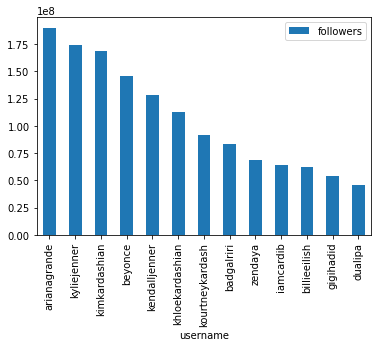

In [61]:
# Create a bar chart displaying the top 1% of accounts in terms of followers
# from the dataset
user_accounts = df[['username', 'followers']]
user_accounts = user_accounts.drop_duplicates(subset="username")
user_accounts = user_accounts.set_index(['username'], drop=True)
user_accounts = user_accounts.sort_values(by=["followers"], axis=0, ascending=False)
num_accounts = len(user_accounts.index)
user_accounts = user_accounts.nlargest(int(num_accounts*0.01), 'followers')
top_1_percent_accounts = user_accounts.plot.bar(y="followers")

In [104]:
# Check which posts received the most number of likes
posts = df[['post_url', 'max_likes', 'username']]
posts = posts.sort_values(by=["max_likes"], axis=0, ascending=False)
num_posts = len(posts.index)
top_0_1_posts = posts.nlargest(int(num_posts*0.001), 'max_likes')
top_0_1_posts

# See who published these posts
# top_0_1_percent_posts = top_0_1_posts.plot.bar(x="username", y="max_likes")

,post_url,max_likes,username
6314,https://www.instagram.com/p/B_GxLGFFQvu/,11025440,billieeilish
2956,https://www.instagram.com/p/B_OHkPMnJr0/,10203237,kyliejenner
8774,https://www.instagram.com/p/B_DR5aNnDR1/,9130384,kyliejenner
8773,https://www.instagram.com/p/B-5dXt6HwjM/,7796613,kyliejenner
2828,https://www.instagram.com/p/B_QUaMpjEq5/,7326552,kendalljenner
8656,https://www.instagram.com/p/B-3BLbJjjnX/,7058172,kendalljenner
8772,https://www.instagram.com/p/B-iPbHIndC_/,7027935,kyliejenner
2955,https://www.instagram.com/p/B-kotcGnVEF/,5751243,kyliejenner
418,https://www.instagram.com/p/B_LoRVAHj6y/,5283711,badgalriri
5757,https://www.instagram.com/p/B--n6suAkmf/,5261516,zendaya
